# Sujet 7 : Autour du SARS-CoV-2 (Covid-19)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

Les données fournies à l'adresse [ci-dessous](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv) correspondent au nombre cumulé de cas de covid dans 279 pays et territoires du monde à partir du 22 janvier 2020 jusqu'à la date de réalisation de ce document (16 novembre 2021).

In [2]:
data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

data_file = "coviddata.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

Ici on a importé les données et on les a copiées dans un fichier locale

In [3]:
raw_data = pd.read_csv(data_file, skiprows=0)
raw_data

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
250                                           NaN                    Togo   
251                                           NaN                   Tonga   
252                                           NaN     Trinidad and Tobago   
253                                           NaN                 Tunisia   
254                                           NaN                  Turkey   
255                                           NaN                      US   
256                                           NaN                  Uganda   
257                                           NaN                 Ukraine   
258                                           NaN    United Arab Emirates   
259                                      Anguilla          United Kingdom   
260                                       Bermuda          United Kingdom   
261                        British Virgin Islands          United Kingdom   
262                                Cayman Islands          United Kingdom   
263                               Channel Islands          United Kingdom   
264                   Falkland Islands (Malvinas)          United Kingdom   
265                                     Gibraltar          United Kingdom   
266                                   Isle of Man          United Kingdom   
267                                    Montserrat          United Kingdom   
268  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
269                      Turks and Caicos Islands          United Kingdom   
270                            

Les colonnes du dataset utilisé ont la signification suivante :


| Nom de colonne   | Libellé de colonne                                   |
|------------------|------------------------------------------------------|
| Province/State   | Division sub-nationale (si présente)                 |
| Country/Region   | Nation                                               |
| Lat              | Latitude d'un point au centre de la province ou du pays  |
| Long             | Longitude d'un point au centre de la province ou du pays  |
| *autres colonnes*| Nombre de cas de COVID-19 confirmés dans la région (nation ou division sub-nationale) ayant eu lieu avant la date en tête de colonne (en format mois-jour-année) |

Maintenant, on sélectionne les pays et les régions que nous intéressent, c'est-à-dire :
- la Belgique (*Belgium*),
- la Chine - toutes les provinces sauf les régions speciales de Hong-Kong (*China*), 
- Hong Kong (*China, Hong-Kong*),
- la France métropolitaine (*France*),
- l’Allemagne (*Germany*), 
- l’Iran (*Iran*), 
- l’Italie (*Italy*), 
- le Japon (*Japan*), 
- la Corée du Sud (*Korea, South*),
- les Pays-bas - partie européenne (*Netherlands*),
- le Portugal (*Portugal*), 
- l’Espagne (*Spain*), 
- le Royaume-Unis sans les territoires d'outre-mer (*United Kingdom*),
- les États-Unis (*US*).

On élimine du dataframe les colonnes sur la latitude et la longitude des régions.

Ensuite, on crée un nouvelle ligne qui somme toutes les valeurs pour la chine en déhors de Hong-Kong, car les données sont présentées divisées par province.

Enfin, on élimine la colonne *Province/State* et on renomme la ligne qui corresponde à Hong-Kong comme *China, Hong Kong* et on trie les résultats en ordre alphabétique.

In [4]:
list_of_countries = ["Belgium", "China", "France", "Germany", "Iran", "Italy", "Japan", "Korea, South", "Netherlands", "Portugal", "Spain", "United Kingdom", "US"]
raw_data_countries = raw_data.loc[raw_data["Country/Region"].isin(list_of_countries)].drop(["Lat", "Long"], axis=1)
clean_data = raw_data_countries.loc[(raw_data_countries["Province/State"].isnull())  | ((raw_data_countries["Country/Region"] == "China") & (raw_data_countries["Province/State"] == "Hong Kong"))].copy()
china_withoutHK = raw_data_countries.loc[((raw_data_countries["Country/Region"] == "China") & (raw_data_countries["Province/State"] != "Hong Kong"))]
sum_China = china_withoutHK.drop(["Province/State", "Country/Region"], axis=1).sum()
sum_China["Country/Region"] = "China, mainland"
clean_data = clean_data.append(dict(sum_China), ignore_index=True)
clean_data.loc[clean_data["Province/State"]=="Hong Kong", "Country/Region"] = "China, Hong Kong"
data = clean_data.drop(["Province/State"], axis=1).sort_values("Country/Region").reset_index(drop=True).copy()#.set_index("Country/Region").sort_index().copy()
data

Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0            Belgium        0        0        0        0        0        0   
1   China, Hong Kong        0        2        2        5        8        8   
2    China, mainland      548      641      918     1401     2067     2869   
3             France        0        0        2        3        3        3   
4            Germany        0        0        0        0        0        1   
5               Iran        0        0        0        0        0        0   
6              Italy        0        0        0        0        0        0   
7              Japan        2        2        2        2        4        4   
8       Korea, South        1        1        2        2        3        4   
9        Netherlands        0        0        0        0        0        0   
10          Portugal        0        0        0        0        0        0   
11             Spain        0        0        0        0        0        0   
12                US        1        1        2        2        5        5   
13    United Kingdom        0        0        0        0        0        0   

    1/28/20  1/29/20  1/30/20    ...      11/7/21   11/8/21   11/9/21  \
0         0        0        0    ...      1414463   1438830   1438830   
1         8       10       10    ...        12368     12368     12369   
2      5501     6077     8131    ...        97900     97962     98016   
3         4        5        5    ...      7037999   7039756   7051795   
4         4        4        4    ...      4792463   4816177   4857463   
5         0        0        0    ...      5987814   5996155   6004460   
6         0        0        0    ...      4808047   4812594   4818705   
7         7        7       11    ...      1723682   1723782   1723976   
8         4        4        4    ...       381694    383407    385831   
9         0        0        0    ...      2201010   2212814   2224096   
10        0        0        0    ...      1097557   1098125   1099307   
11        0        0        0    ...      5025639   5032056   5032056   
12        5        6        6    ...     46524348  46636670  46716709   
13        0        0        0    ...      9301909   9333891   9366676   

    11/10/21  11/11/21  11/12/21  11/13/21  11/14/21  11/15/21  11/16/21  
0    1463548   1463548   1484712   1484712   1484712   1512474   1524862  
1      12374     12377     12378     12380     12381     12387     12388  
2      98080     98176     98251     98340     98392     98414     98445  
3    7062794   7075244   7079005   7093651   7106147   7109125   7128903  
4    4908540   4957374   5002730   5037039   5056242   5091200   5144827  
5    6012408   6019947   6027269   6031575   6037718   6045212   6051642  
6    4826738   4835435   4843957   4852496   4860061   4865260   4873075  
7    1724172   1724379   1724573   1724767   1724893   1724967   1725111  
8     388351    390719    393042    395460    397466    399591    402775  
9    2236744   2253031   2269235   2283083   2295107   2314304   2334472  
10   1100961   1102438   1104189   1106005   1107488   1108462   1110155  
11   5038517   5042803   5047156   5047156   5047156   5056954   5061045  
12  46811405  46866719  47007119  47054618  47079428  47221527  47309008  
13   9406001   9448402   9487302   9524971   9561099   9600369   9637190  

[14 rows x 666 columns]

Ici on convertit les index du tableau en format *date*

In [5]:
column_headers = pd.to_datetime(data.columns.values[1:])
arr = list(column_headers.to_pydatetime())
data.columns = [data.columns.values[0]] + arr
data

Country/Region  2020-01-22 00:00:00  2020-01-23 00:00:00  \
0            Belgium                    0                    0   
1   China, Hong Kong                    0                    2   
2    China, mainland                  548                  641   
3             France                    0                    0   
4            Germany                    0                    0   
5               Iran                    0                    0   
6              Italy                    0                    0   
7              Japan                    2                    2   
8       Korea, South                    1                    1   
9        Netherlands                    0                    0   
10          Portugal                    0                    0   
11             Spain                    0                    0   
12                US                    1                    1   
13    United Kingdom                    0                    0   

    2020-01-24 00:00:00  2020-01-25 00:00:00  2020-01-26 00:00:00  \
0                     0                    0                    0   
1                     2                    5                    8   
2                   918                 1401                 2067   
3                     2                    3                    3   
4                     0                    0                    0   
5                     0                    0                    0   
6                     0                    0                    0   
7                     2                    2                    4   
8                     2                    2                    3   
9                     0                    0                    0   
10                    0                    0                    0   
11                    0                    0                    0   
12                    2                    2                    5   
13                    0                    0                    0   

    2020-01-27 00:00:00  2020-01-28 00:00:00  2020-01-29 00:00:00  \
0                     0                    0                    0   
1                     8                    8                   10   
2                  2869                 5501                 6077   
3                     3                    4                    5   
4                     1                    4                    4   
5                     0                    0                    0   
6                     0                    0                    0   
7                     4                    7                    7   
8                     4                    4                    4   
9                     0                    0                    0   
10                    0                    0                    0   
11                    0                    0                    0   
12                    5                    5                    6   
13                    0                    0                    0   

    2020-01-30 00:00:00         ...           2021-11-07 00:00:00  \
0                     0         ...                       1414463   
1                    10         ...                         12368   
2                  8131         ...                         97900   
3                     5         ...                       7037999   
4                     4         ...                       4792463   
5                     0         ...                       5987814   
6                     0         ...                       4808047   
7                    11         ...                       1723682   
8                     4         ...                        381694   
9                     0         ...                       2201010   
10                    0         ...                       1097557   
11                    0         ...                       5025639   
12                    6         ...           

On peut enfin représenter le nombre de cas cumulés de COVID par pays dans un graph à échelle linéaire ...

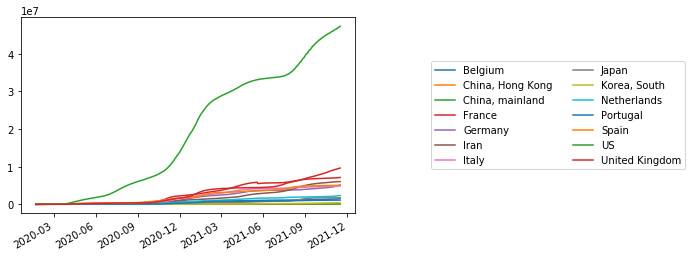

In [6]:
data_to_plot = data.set_index("Country/Region").transpose().copy()
data_to_plot.plot()
plt.legend(loc="right", bbox_to_anchor=(2.0, 0.5), ncol=2)

... et à échelle logarithmique.

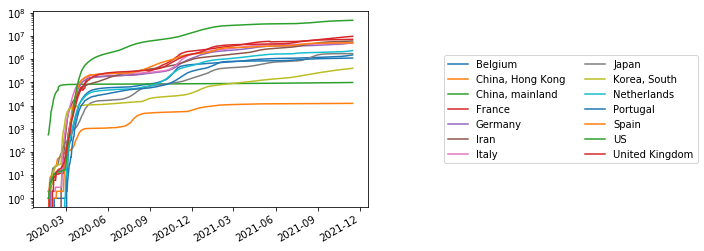

In [7]:
data_to_plot.plot(logy=True)
plt.legend(loc="right", bbox_to_anchor=(2.0, 0.5), ncol=2)